Tracing clear.gif
==========

This notebook takes the spacer gifs from [this page]() and hunts for them in the UKWA 1996-2010 Solr index.

First we set up the hashes on the known files.

In [6]:
clears = []
clears.append( {"hash": "7KUBIUXQYGNTAS4J6AEG7BNCSQNFPQZN", "names": ["visit.gif"], "total": 406 } )
clears.append( {"hash": "D2VQOLYTNWE6VT3MMPGIQANFPXGIS4SW", "names": ["c.gif"], "total": 814 } )
clears.append( {"hash": "FWXKVC27DHYLYIE5S5WAFPLKZNI3ACYK", "names": ["n.gif", "spaceball.gif"], "total": 180895 } )
clears.append( {"hash": "GF2JNIEW23EGJBVHDVCSDGKLZULRU25T", "names": ["clear.gif"], "total": 16949 } )
clears.append( {"hash": "GKHEOJZBVEZULAA62VJTEQHKYLI7QSMM", "names": ["dot_clear.gif","pixel.gif"], "total": 203802 } )
clears.append( {"hash": "K3KF7CQX6UDYUIFPTFRMTEWKIZ4EKB3F", "names": ["cleardot.gif", "cleardot.gif"], "total": 2365898 } )
clears.append( {"hash": "TUA4YXOI4BBMBVFNNT5YWOWDR2CKL347", "names": ["blank.gif"], "total": 29252 } )

extra = {"hash": "EXMAIMZW5N4Z4UVRUDQV75VZLYE4ETRV", "names": ["ANJcron.php.gif"], "total": 196746 } 

print(clears[5])

def json_name(k,y):
    return "json/%s-for-%s.json" % (k,y)


{'hash': 'K3KF7CQX6UDYUIFPTFRMTEWKIZ4EKB3F', 'total': 2365898, 'names': ['cleardot.gif', 'cleardot.gif']}


Then we download the history data. This is disabled usually, as it takes a long time and can only be done with direct access to the Solr server. The files have been downloaded and are available locally.

(it seems this is Python2 only anyway)

In [2]:
import json, sys, codecs, hashlib
import urllib, datetime, re
from pprint import pprint
    
#
#urlo = urllib.FancyURLopener({"http":"http://explorer.bl.uk:3127"})
#
urlo=urllib.URLopener()

q = "http://192.168.1.181:8983/solr/jisc5/select?q=hash%%3A%%22sha1%%3A%s%%22&fq=crawl_years%%3A%s&rows=5&wt=json&indent=true&facet=true&facet.field=domain&facet.mincount=1&sort=crawl_date+asc"

for c in clears:
    for y in range(1996,2011):
        k = c['hash']
        yq = q % ( k, y )
        print("GET %s %s - %s" % (k,y, yq) )
        # Currently disabled as the data has been downloaded already:
        #urlo.retrieve(yq , json_name(k,y) )

print("DONE")

AttributeError: 'module' object has no attribute 'URLopener'

Next, we parse the json output and re-assemble the data into a more useful form.

In [65]:
import json
import numpy as np
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
%matplotlib inline
#%pylab inline

# Loop over the items and years:
td = {}
for c in clears:
    k = c['hash']
    n = c['names']
    values = []
    years = []
    for y in range(1996,2011):
        fn = json_name(k,y)
        #print("PARSE %s %s - %s" % (k,y, f) )
        with open( fn ) as data_file:
            data = json.load(data_file)
            years.append(y)
            values.append(data['response']['numFound'])
            #pprint(data['facet_counts']['facet_fields']['domain'][0:10])
    # And add:
    td[", ".join(n)] = pd.Series(values,index=years)

df = pd.DataFrame(td)       
print(df)

      blank.gif  c.gif  clear.gif  cleardot.gif, cleardot.gif  \
1996          2      0          0                           0   
1997         17      7         30                          15   
1998         15      9        437                          91   
1999          0      0          0                           0   
2000          0      0          0                           0   
2001        324    189       2510                       17388   
2002        242    165       2226                       33840   
2003        254    186       4170                       17890   
2004        225    148       4481                      261868   
2005        852    143       2257                      104388   
2006      10737    231       4332                       95634   
2007      10588    136       2834                       89099   
2008        332      8        123                     1063042   
2009        418      8         81                      253089   
2010       7446     12   

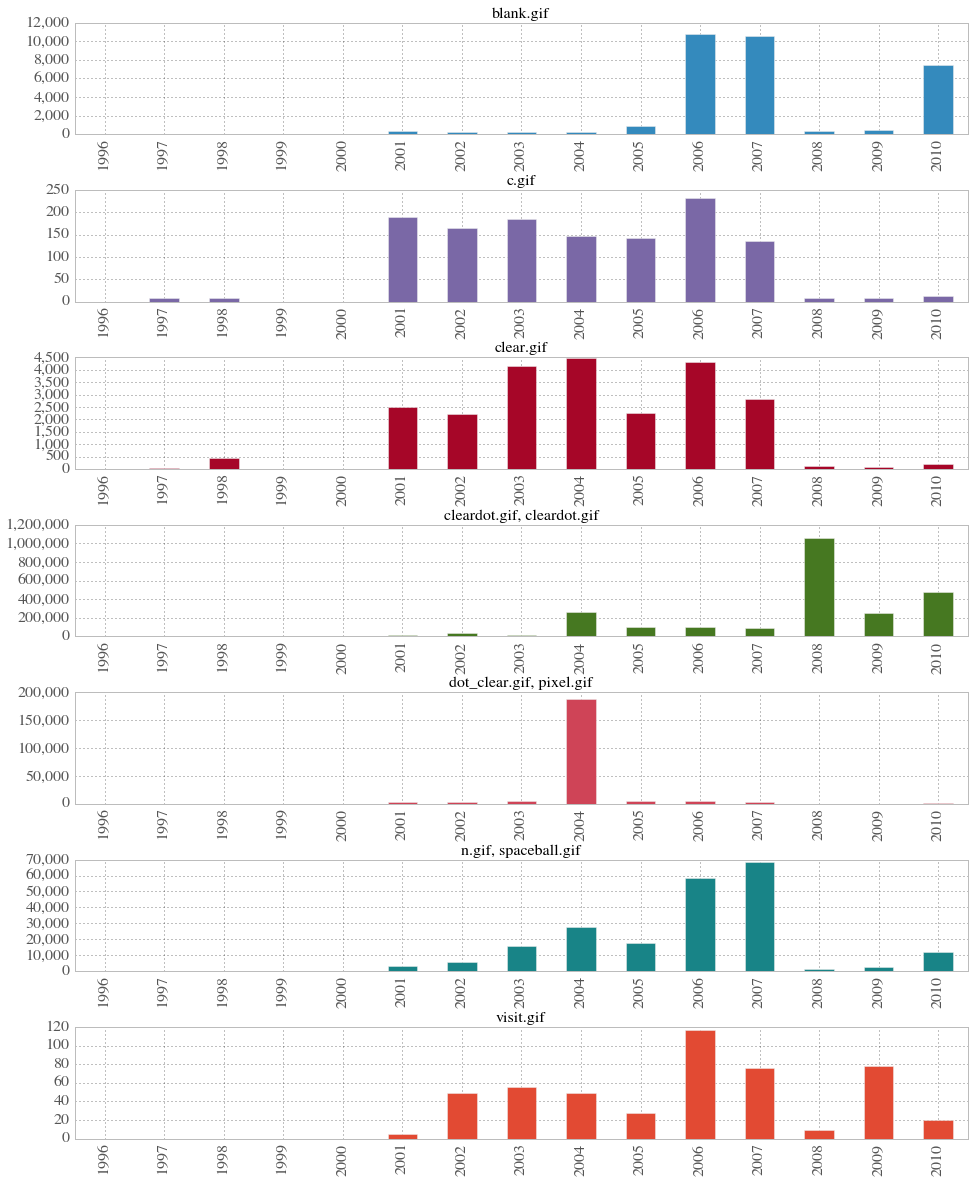

In [77]:
# Update the matplotlib configuration parameters:
matplotlib.rcParams.update({'font.size': 16, 'font.family': 'STIXGeneral', 
                            'mathtext.fontset': 'stix', 'axes.titlesize': 'medium' })

# Plot:
axs = df.plot(kind='bar', subplots=True, figsize=(16,20), legend=False, sharex=False)

# No border on the legend, please:
#leg = plt.legend(loc="best")
#leg.get_frame().set_linewidth(0.0)

# Use a logarithmic Y-axis (doesn't look great):
#ax.set_yscale("log")

# Dark Magic to get commas to show up in the integers on the Y axis:
for ax in axs:
    ax.get_yaxis().set_major_formatter(
        matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

